In [49]:
!which python

/home/mahdi/miniconda3/bin/python


In [50]:
import os
import sys
import pandas as pd
import numpy as np
import netCDF4 as nc
import xarray as xr
import geopandas as gpd

sys.path.append('/home/mahdi/WaterBalance/')

In [51]:
%store -r ds_array_1
%store -r xds_repr_match__sub_soilmoisture
%store -r xds_repr_match__soilmoisture
%store -r E_a_pyet

In [52]:
underground_runoff = ds_array_1['underground_runoff'].to_dataset()
E_a_pyet.rio.write_crs("epsg:4326", inplace=True)
E_a_pyet = E_a_pyet.rename({'lon': 'x','lat': 'y'})
E_a_pyet

<xarray.Dataset>
Dimensions:      (time: 1, x: 20, y: 13)
Coordinates:
  * x            (x) float32 -109.3 -109.2 -109.1 ... -107.6 -107.5 -107.4
  * y            (y) float32 44.55 44.45 44.35 44.25 ... 43.65 43.55 43.45 43.35
  * time         (time) datetime64[ns] 2022-01-31
    spatial_ref  int64 0
Data variables:
    Hargreaves   (time, y, x) float64 0.1557 0.1574 0.1592 ... 0.1864 0.1841

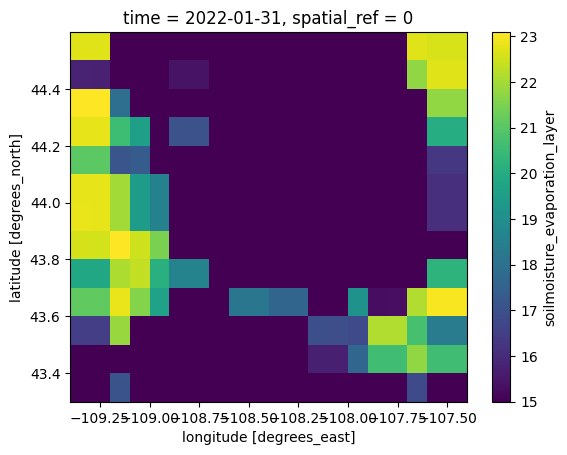

In [53]:
from qdwb.soil_content.soil_content import *
from qdwb.soil_content.constant import *



# soil_water_content_of_evaporation_layer_at_previous_step = xds_repr_match__soilmoisture
# infiltration = underground_runoff
# evaporation = E_a_pyet
# field_capacity_soil_water_content_of_evaporation_layer = 60
# permanent_wilting_point_soil_water_content_of_evaporation_layer = 15
# coverd = True
# infiltration_to_transpiration_layer = 2
# infiltration_to_transition_layer = 0

# temp_1 = (soil_water_content_of_evaporation_layer_at_previous_step.ssm.values) + (infiltration.underground_runoff.values) - (evaporation.Hargreaves.values) - (infiltration_to_transpiration_layer)

E_a_pyet = list(E_a_pyet.Hargreaves.values.flatten())
underground_runoff = list(underground_runoff.underground_runoff.values.flatten())
soil = list(xds_repr_match__soilmoisture.ssm.values.flatten())

a = np.array([SoilContent.evaporation_layer(
    soil_water_content_of_evaporation_layer_at_previous_step = float(z),
    infiltration = float(j),
    evaporation = float(i),
    field_capacity_soil_water_content_of_evaporation_layer = 60,
    permanent_wilting_point_soil_water_content_of_evaporation_layer = 15,
    coverd = True,
    infiltration_to_transpiration_layer = 2
)
for i, j, z in zip(E_a_pyet, underground_runoff, soil)])

a = a.reshape(1,13,20)


ds_array = ds_array_1.assign(soilmoisture_evaporation_layer=(['time', 'y', 'x'], a))
ds_array.soilmoisture_evaporation_layer.plot()